In [42]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from math import sqrt
import pandas as pd
import glob
%matplotlib inline

In [236]:
# path to training_data folder
TRAIN_DATA_DIR = "/home/surajx/git/directed-explore/projects/phi_explore/data/training_data"

def getDataListForGame(game):
    PROCESSED_DATA = TRAIN_DATA_DIR + "/" + game + "/" + "processed"
    dataLists = {}
    for folder in glob.glob(PROCESSED_DATA + "/*"):
        dataLists[folder.split("/")[-1]] = []
        for datafile in glob.glob(PROCESSED_DATA + "/" + folder.split("/")[-1] + "/*.log"):
            df = pd.read_csv(datafile)
            df.columns=['score','frames']
            dataLists[folder.split("/")[-1]].append(df)
    return dataLists

def getDataStatsForData(dataLists):
    meanDFs = {}
    stderrDFs = {}
    for key in dataLists.keys():
        keyDF = (pd.concat(dataLists[key], axis=1, keys=range(len(dataLists[key])))  
                .swaplevel(0, 1, axis=1)
                .sortlevel(axis=1)  
                .groupby(level=0, axis=1))
        meanDFs[key] = keyDF.mean()
        stderrDFs[key] = keyDF.std().div(sqrt(len(dataLists[key]))).mul(2.0)
        keyDF = None
    return (meanDFs, stderrDFs)

def plotGameDataForStats(game, stats, lim=1e8):
    meanDFs, stderrDFs = stats
    for key in meanDFs.keys():
        pass
    for column in meanDFs[key].columns: 
        if not (column == "frames"):      
            img = plt.figure(figsize=(5, 3))
            plt.title(game.replace("_", " "))
            plt.ylabel(column.replace("_", " ").title())
            plt.xlabel("Frames")
            for key in meanDFs.keys():
                if(key=='Baseline'):
                    #Orange
                    color='#CC4F1B'
                    facecolor='#FF9848'
                else:
                    #Green
                    color='#239b56'
                    facecolor='#82e0aa'
                plt.xlim(0,lim)
                plt.plot(meanDFs[key]["frames"], meanDFs[key][column], 'k', color=color, label=key) #, yerr=stderrDFs[key][column], label=key, color='#CC4F1B')
                plt.fill_between(meanDFs[key]["frames"], meanDFs[key][column]-stderrDFs[key][column], meanDFs[key][column]+stderrDFs[key][column], alpha=0.8, edgecolor='none', facecolor=facecolor)
            plt.legend(loc=2)

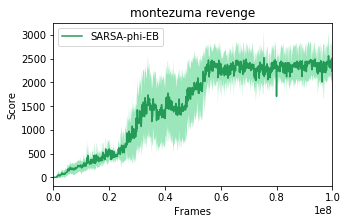

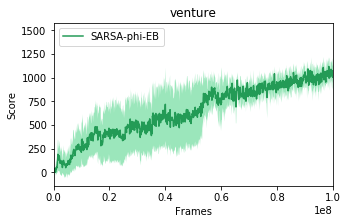

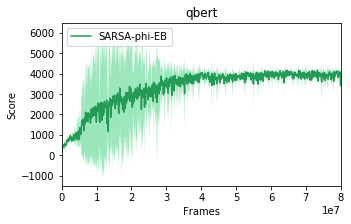

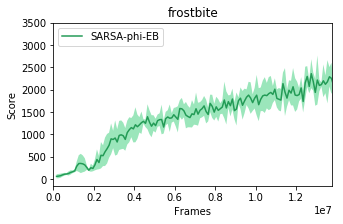

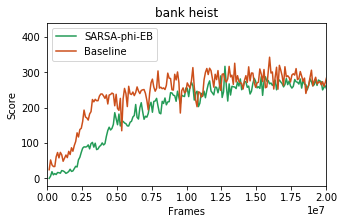

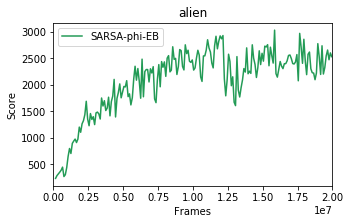

In [237]:
montezuma_dataList = getDataListForGame("montezuma_revenge")
montezuma_stats = getDataStatsForData(montezuma_dataList)
plotGameDataForStats("montezuma_revenge", montezuma_stats)

venture_dataList = getDataListForGame("venture")
venture_stats = getDataStatsForData(venture_dataList)
plotGameDataForStats("venture", venture_stats)

qbert_dataList = getDataListForGame("qbert")
qbert_stats = getDataStatsForData(qbert_dataList)
plotGameDataForStats("qbert", qbert_stats, lim=0.8e8)

frostbite_dataList = getDataListForGame("frostbite")
frostbite_stats = getDataStatsForData(frostbite_dataList)
plotGameDataForStats("frostbite", frostbite_stats, lim=0.138e8)

bank_heist_dataList = getDataListForGame("bank_heist")
bank_heist_stats = getDataStatsForData(bank_heist_dataList)
plotGameDataForStats("bank_heist", bank_heist_stats, lim=0.2e8)

alien_dataList = getDataListForGame("alien")
alien_stats = getDataStatsForData(alien_dataList)
plotGameDataForStats("alien", alien_stats, lim=0.2e8)